## Project: Milestone 3

### DSC 540

#### Taniya Adhikari 2/7/2021

In [933]:
from bs4 import BeautifulSoup as BS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings; warnings.simplefilter('ignore')
%matplotlib inline

### 1. Reading the data from the html file and webscraped the data table

I had to save the data into .html so I can preserve the filters in the data from stock screener of TradingView website because it did not let me use get method to retrieve the data.

In [934]:
# read the data
fd = open("Stock Screener.html", "r", encoding='utf8')
soup = BS(fd)
fd.close()

In [935]:
all_tables = soup.find_all("table")

In [936]:
print("Total number of tables are {} ".format(len(all_tables)))

Total number of tables are 2 


In [937]:
table = all_tables[1]

In [938]:
# find all the headers
hd = table.thead.findAll('tr', recursive=False)[0].findAll('th', recursive=False)

# creates a list of table headers
headers = [] 
for td in hd:

    if td.findAll('div',{"class":"js-head-title tv-screener-table__head-left--title-two-lines"}):
        header_tag = td.findAll('div',{"class":"js-head-title tv-screener-table__head-left--title-two-lines"})
        for div in header_tag:
            header = div.getText().strip()
            headers.append(header)
    
    elif td.findAll('div',{"class":"js-head-title tv-screener-table__head-left--title-three-lines"}):
        header_tag = td.findAll('div',{"class":"js-head-title tv-screener-table__head-left--title-three-lines"})
        for div in header_tag:
            header = div.getText().strip()
            headers.append(header)
    else:
        None


In [939]:
del headers[0]
headers

['Mkt Cap',
 'EPS Diluted (FY)',
 '1-Y Beta',
 'Current Ratio',
 'DEBT/EQUITY',
 'Div Yield',
 'Div per Share (FY)',
 'EBITDA',
 'EPS Forecast',
 'Gross Profit (FY)',
 'Income',
 'P/B (FY)',
 'P/S',
 'Price/Free Cash Flow',
 'Quick Ratio',
 'ROA',
 'ROE',
 'ROI %',
 'Assets',
 'Debt',
 'Revenue',
 'YTD Perf',
 'Yearly Perf',
 'P/E',
 'Price/Rev',
 'Current Assets']

In [940]:
# find all data for the columns
dt = table.tbody.findAll('tr', recursive=False)

data = [] 
for td in dt: 
    data.append(td)

In [941]:
df1_data = [[td.getText().strip() for td in tr.findAll('td')] for tr in data]

for i in range(len(df1_data)):
    del df1_data[i][0]
len(df1_data)

2225

In [942]:
ticker_symbol = []
i = 0
for tr in data:
    x = tr.findAll('td')[0].findAll('a',{'class':'tv-screener__symbol apply-common-tooltip'})
    s = [a.getText().strip() for a in x]
    ticker_symbol.append(s)
len(ticker_symbol)

2225

In [943]:
values_df = pd.DataFrame(df1_data, columns=headers)

In [944]:
values_df

,Mkt Cap,EPS Diluted (FY),1-Y Beta,Current Ratio,DEBT/EQUITY,Div Yield,Div per Share (FY),EBITDA,EPS Forecast,Gross Profit (FY),...,ROE,ROI %,Assets,Debt,Revenue,YTD Perf,Yearly Perf,P/E,Price/Rev,Current Assets
0,1.003B,0.38,1.13,2.50,0.21,2.33%,0.64,92.546M,0.20,165.949M,...,1.40,1.16%,1.744B,212.332M,2.053B,1.85%,3.30%,72.19,0.49,1.202B
1,1.004B,0.99,1.01,—,3.04,0.00%,0.00,422.741M,0.50,285.876M,...,4.67,1.22%,5.413B,3.721B,688.03M,2.76%,103.83%,17.83,1.55,—
2,1.004B,2.26,1.52,1.43,0.23,0.00%,0.00,125.402M,0.79,210.309M,...,14.06,10.36%,1.019B,93.499M,2.071B,−0.10%,106.61%,18.90,0.46,658.762M
3,1.005B,−3.90,1.63,4.54,0.35,0.00%,0.00,-49.635M,−0.31,172K,...,−90.03,−65.41%,71.902M,14.256M,4.227M,221.02%,1522.66%,—,153.88,57.997M
4,1.006B,0.60,1.08,0.21,0.90,3.57%,0.46,—,0.27,—,...,5.05,3.18%,8.942B,844.39M,351.461M,6.89%,−17.45%,21.44,2.94,441.958M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,1408.156B,54.92,0.86,3.07,0.13,0.00%,—,54.744B,15.39,97.618B,...,19.00,17.36%,319.616B,27.872B,182.35B,19.18%,41.22%,36.01,7.69,174.296B
2221,1414.337B,54.92,0.85,3.07,0.13,0.00%,—,54.744B,15.46,97.618B,...,19.00,17.36%,319.616B,27.872B,182.35B,19.76%,41.83%,36.17,7.72,174.296B
2222,1688.025B,41.83,0.53,1.05,1.08,0.00%,—,48.076B,9.64,152.757B,...,27.44,14.08%,321.195B,100.504B,386.064B,2.92%,61.22%,79.78,4.43,132.733B
2223,1826.726B,5.76,0.81,2.58,0.64,0.92%,2.04,72.183B,1.77,96.937B,...,42.70,26.05%,304.137B,82.782B,143.015B,8.89%,31.71%,36.04,12.02,173.973B


In [945]:
ticker_df = pd.DataFrame(ticker_symbol)
ticker_df = ticker_df.rename(columns={0: 'Ticker'})
ticker_df

,Ticker
0,BHE
1,TGH
2,MYRG
3,ACRS
4,BRKL
...,...
2220,GOOGL
2221,GOOG
2222,AMZN
2223,MSFT


### 2. Stripping string data of whitespace

In [946]:
def no_whitespace(string):
    return string.strip()

# stripping white space from all column type as object
def clean_string(df):
    
    for col in df.columns:
        if df[col].dtype == np.object:
            new = '{}_new'.format(col)
            df[new] = df[col].apply(no_whitespace)
            df[col] = df[new]
            df = df.drop(columns=[new])
    return df


In [947]:
ticker_df = clean_string(ticker_df)
ticker_df.head(2)

,Ticker
0,BHE
1,TGH


### 3. Renaming data headers

In [948]:
# checking data type
def Datatype(df):
    # shape and data types of the data
    print("There are {} rows and {} columns".format(df.shape[0], df.shape[1]))
    print(df.dtypes)

    # select numeric columns
    df_numeric = df.select_dtypes(include=[np.number])
    numeric_cols = df_numeric.columns.values
    print(numeric_cols)

    # select non numeric columns
    df_non_numeric = df.select_dtypes(exclude=[np.number])
    non_numeric_cols = df_non_numeric.columns.values
    print(non_numeric_cols)

In [949]:
Datatype(values_df)

There are 2225 rows and 26 columns
Mkt Cap                 object
EPS Diluted (FY)        object
1-Y Beta                object
Current Ratio           object
DEBT/EQUITY             object
Div Yield               object
Div per Share (FY)      object
EBITDA                  object
EPS Forecast            object
Gross Profit (FY)       object
Income                  object
P/B (FY)                object
P/S                     object
Price/Free Cash Flow    object
Quick Ratio             object
ROA                     object
ROE                     object
ROI %                   object
Assets                  object
Debt                    object
Revenue                 object
YTD Perf                object
Yearly Perf             object
P/E                     object
Price/Rev               object
Current Assets          object
dtype: object
[]
['Mkt Cap' 'EPS Diluted (FY)' '1-Y Beta' 'Current Ratio' 'DEBT/EQUITY'
 'Div Yield' 'Div per Share (FY)' 'EBITDA' 'EPS Forecast'
 'Gross Profi

In [950]:
# renaming headers
values_df = values_df.rename(columns={"Mkt Cap": "Mkt_Cap", "EPS Diluted (FY)": "EPS_Diluted_FY","1-Y Beta": "Beta_1Yr", 
                        "Current Ratio": "Current _Ratio", "DEBT/EQUITY": "Debt_to_Equity", "Div Yield": "Div_Yield%", 
                        "Div per Share (FY)": "Div_per_Share","EPS Forecast": "EPS_Forecast", "Gross Profit (FY)":"Gross_Profit", 
                        "Income":"Net_Income","P/B (FY)":"Price_to_Book", "P/S":"Price_to_Sales", "Price/Free Cash Flow":"Price_to FCF",
                        "Quick Ratio":"Quick_Ratio","ROA":"ROA%","ROE":"ROE%", "ROI %":"ROI%","Assets":"Total_Assets", "Debt":"Total_Debt", 
                        "Revenue":"Total_Revenue", "YTD Perf":"YTD_Perf%", "Yearly Perf":"Yearly_Perf%","P/E":"Price_to_Earnings",
                        "Price_Rev":"Price_to_Revenue","Current_Assets":"Current_Assets"})
values_df.head()

,Mkt_Cap,EPS_Diluted_FY,Beta_1Yr,Current _Ratio,Debt_to_Equity,Div_Yield%,Div_per_Share,EBITDA,EPS_Forecast,Gross_Profit,...,ROE%,ROI%,Total_Assets,Total_Debt,Total_Revenue,YTD_Perf%,Yearly_Perf%,Price_to_Earnings,Price/Rev,Current Assets
0,1.003B,0.38,1.13,2.50,0.21,2.33%,0.64,92.546M,0.20,165.949M,...,1.40,1.16%,1.744B,212.332M,2.053B,1.85%,3.30%,72.19,0.49,1.202B
1,1.004B,0.99,1.01,—,3.04,0.00%,0.00,422.741M,0.50,285.876M,...,4.67,1.22%,5.413B,3.721B,688.03M,2.76%,103.83%,17.83,1.55,—
2,1.004B,2.26,1.52,1.43,0.23,0.00%,0.00,125.402M,0.79,210.309M,...,14.06,10.36%,1.019B,93.499M,2.071B,−0.10%,106.61%,18.90,0.46,658.762M
3,1.005B,−3.90,1.63,4.54,0.35,0.00%,0.00,-49.635M,−0.31,172K,...,−90.03,−65.41%,71.902M,14.256M,4.227M,221.02%,1522.66%,—,153.88,57.997M
4,1.006B,0.60,1.08,0.21,0.90,3.57%,0.46,—,0.27,—,...,5.05,3.18%,8.942B,844.39M,351.461M,6.89%,−17.45%,21.44,2.94,441.958M


### 4. Transforming Data Types from object to integers

In [951]:
def num_conversion(string):
    # converting it to billions
    if 'B' in string:
        x = string.replace('B', '')
        x = no_whitespace(x)
        value = float(x)
        value = value*1e9
        value = int(value)
    
    # converting it to millions
    elif 'M' in string:
        x = string.replace('M', '')
        x = no_whitespace(x)
        value = float(x)
        value = value*1000000
        value = int(value)
    
    # converting it to thousands
    elif 'K' in string:
        x = string.replace('K', '')
        x = no_whitespace(x)
        value = float(x)
        value = value*1000
        value = int(value)
    
    # converting it to percentage
    elif '%' in string:
        if '−' in string:
            x = string.replace('%', '')
            x = x.replace('−', '')
            x = no_whitespace(x)
            value = float(x)*(-1)
        else:
            x = string.replace('%', '')
            x = no_whitespace(x)
            value = float(x)
    
    elif '−' in string:
        x = string.replace('−', '')
        x = no_whitespace(x)
        value = float(x)*(-1)
    
    elif '—' in string:
        value = np.nan
    else:
        x = string
        x = no_whitespace(x)
        value = float(x)
        
    return value

In [952]:
# stripping white space from all column type as object
def string_to_float(df):
   
    for col in df.columns:
        new = '{}_new'.format(col)
        df[new] = ''
        df[new] = df[col].apply(num_conversion)
        df[col] = df[new]
        df = df.drop(columns=[new])

    return df


In [953]:
values_df = string_to_float(values_df)

In [954]:
Datatype(values_df)

There are 2225 rows and 26 columns
Mkt_Cap                int64
EPS_Diluted_FY       float64
Beta_1Yr             float64
Current _Ratio       float64
Debt_to_Equity       float64
Div_Yield%           float64
Div_per_Share        float64
EBITDA               float64
EPS_Forecast         float64
Gross_Profit         float64
Net_Income           float64
Price_to_Book        float64
Price_to_Sales       float64
Price_to FCF         float64
Quick_Ratio          float64
ROA%                 float64
ROE%                 float64
ROI%                 float64
Total_Assets         float64
Total_Debt           float64
Total_Revenue        float64
YTD_Perf%            float64
Yearly_Perf%         float64
Price_to_Earnings    float64
Price/Rev            float64
Current Assets       float64
dtype: object
['Mkt_Cap' 'EPS_Diluted_FY' 'Beta_1Yr' 'Current _Ratio' 'Debt_to_Equity'
 'Div_Yield%' 'Div_per_Share' 'EBITDA' 'EPS_Forecast' 'Gross_Profit'
 'Net_Income' 'Price_to_Book' 'Price_to_Sales' 'Price_t

Integrating values with Tickers

In [955]:
df= pd.concat([ticker_df, values_df], axis=1)

### 5. Check for duplicates

In [956]:
print("Ticker Symbol duplicated: {}".format(any(df.Ticker.duplicated())))

Ticker Symbol duplicated: False


### 6. Handling Missing Values

I created a function to check the percentage of missing values in each feature. deleing null values is always risky, it needs careful analysis. I attempt to check which feature has highest missing values an ddepending on it's important I will either delete or keep the features

In [967]:
# check for missing value
def percentMissing(df):
    
    df_numeric = df.select_dtypes(include=[np.number])
    numeric_cols = df_numeric.columns.values
    print(numeric_cols)
    
    # % of missing data
    for col in df.columns:
        # create missing indicator for features with missing data
        missing = df[col].isnull()
        pct_missing = np.mean(missing)*100
        print('{} - {}%'.format(col, round(pct_missing)))
        num_missing = np.sum(missing)
        
    return df

In [968]:
df_missing = percentMissing(df)

['Mkt_Cap' 'EPS_Diluted_FY' 'Beta_1Yr' 'Current _Ratio' 'Debt_to_Equity'
 'Div_Yield%' 'Div_per_Share' 'EBITDA' 'EPS_Forecast' 'Gross_Profit'
 'Net_Income' 'Price_to_Book' 'Price_to_Sales' 'Price_to FCF'
 'Quick_Ratio' 'ROA%' 'ROE%' 'ROI%' 'Total_Assets' 'Total_Debt'
 'Total_Revenue' 'YTD_Perf%' 'Yearly_Perf%' 'Price_to_Earnings'
 'Price/Rev' 'Current Assets']
Ticker - 0%
Mkt_Cap - 0%
EPS_Diluted_FY - 1%
Beta_1Yr - 1%
Current _Ratio - 5%
Debt_to_Equity - 5%
Div_Yield% - 0%
Div_per_Share - 12%
EBITDA - 18%
EPS_Forecast - 3%
Gross_Profit - 15%
Net_Income - 1%
Price_to_Book - 19%
Price_to_Sales - 6%
Price_to FCF - 45%
Quick_Ratio - 20%
ROA% - 5%
ROE% - 9%
ROI% - 5%
Total_Assets - 0%
Total_Debt - 0%
Total_Revenue - 1%
YTD_Perf% - 1%
Yearly_Perf% - 8%
Price_to_Earnings - 40%
Price/Rev - 9%
Current Assets - 5%


Based on the above analysis, Price_to_Earnings has 40% of the data missing and Price_to FCF has 45% of data missing along with other variables with less than 20% of the data missing. Losing high percentage of data is not recommended. I am going to wait for to remove some of these features because, some of them can be calculated with the data from API such as PE ratio. This part I am going to redo it after I fetch the data from API, and merge all 3 datasets.

### 7. Identifying Outliers

I am going to attempt to check for outliers without deleting missing values from the original transformed data. SO I will be splitting the variables with high outliers vs. low outliers

In [960]:
# drop columns
num_df = df_missing.drop(['Ticker','Div_per_Share','EBITDA','Gross_Profit','Price_to_Book','Quick_Ratio','Price_to_Earnings', 'Price_to FCF'], axis=1)
num_df.shape

(2225, 19)

In [961]:
# dropping rows
num_df = num_df.dropna(axis=0)
num_df.shape

(1757, 19)

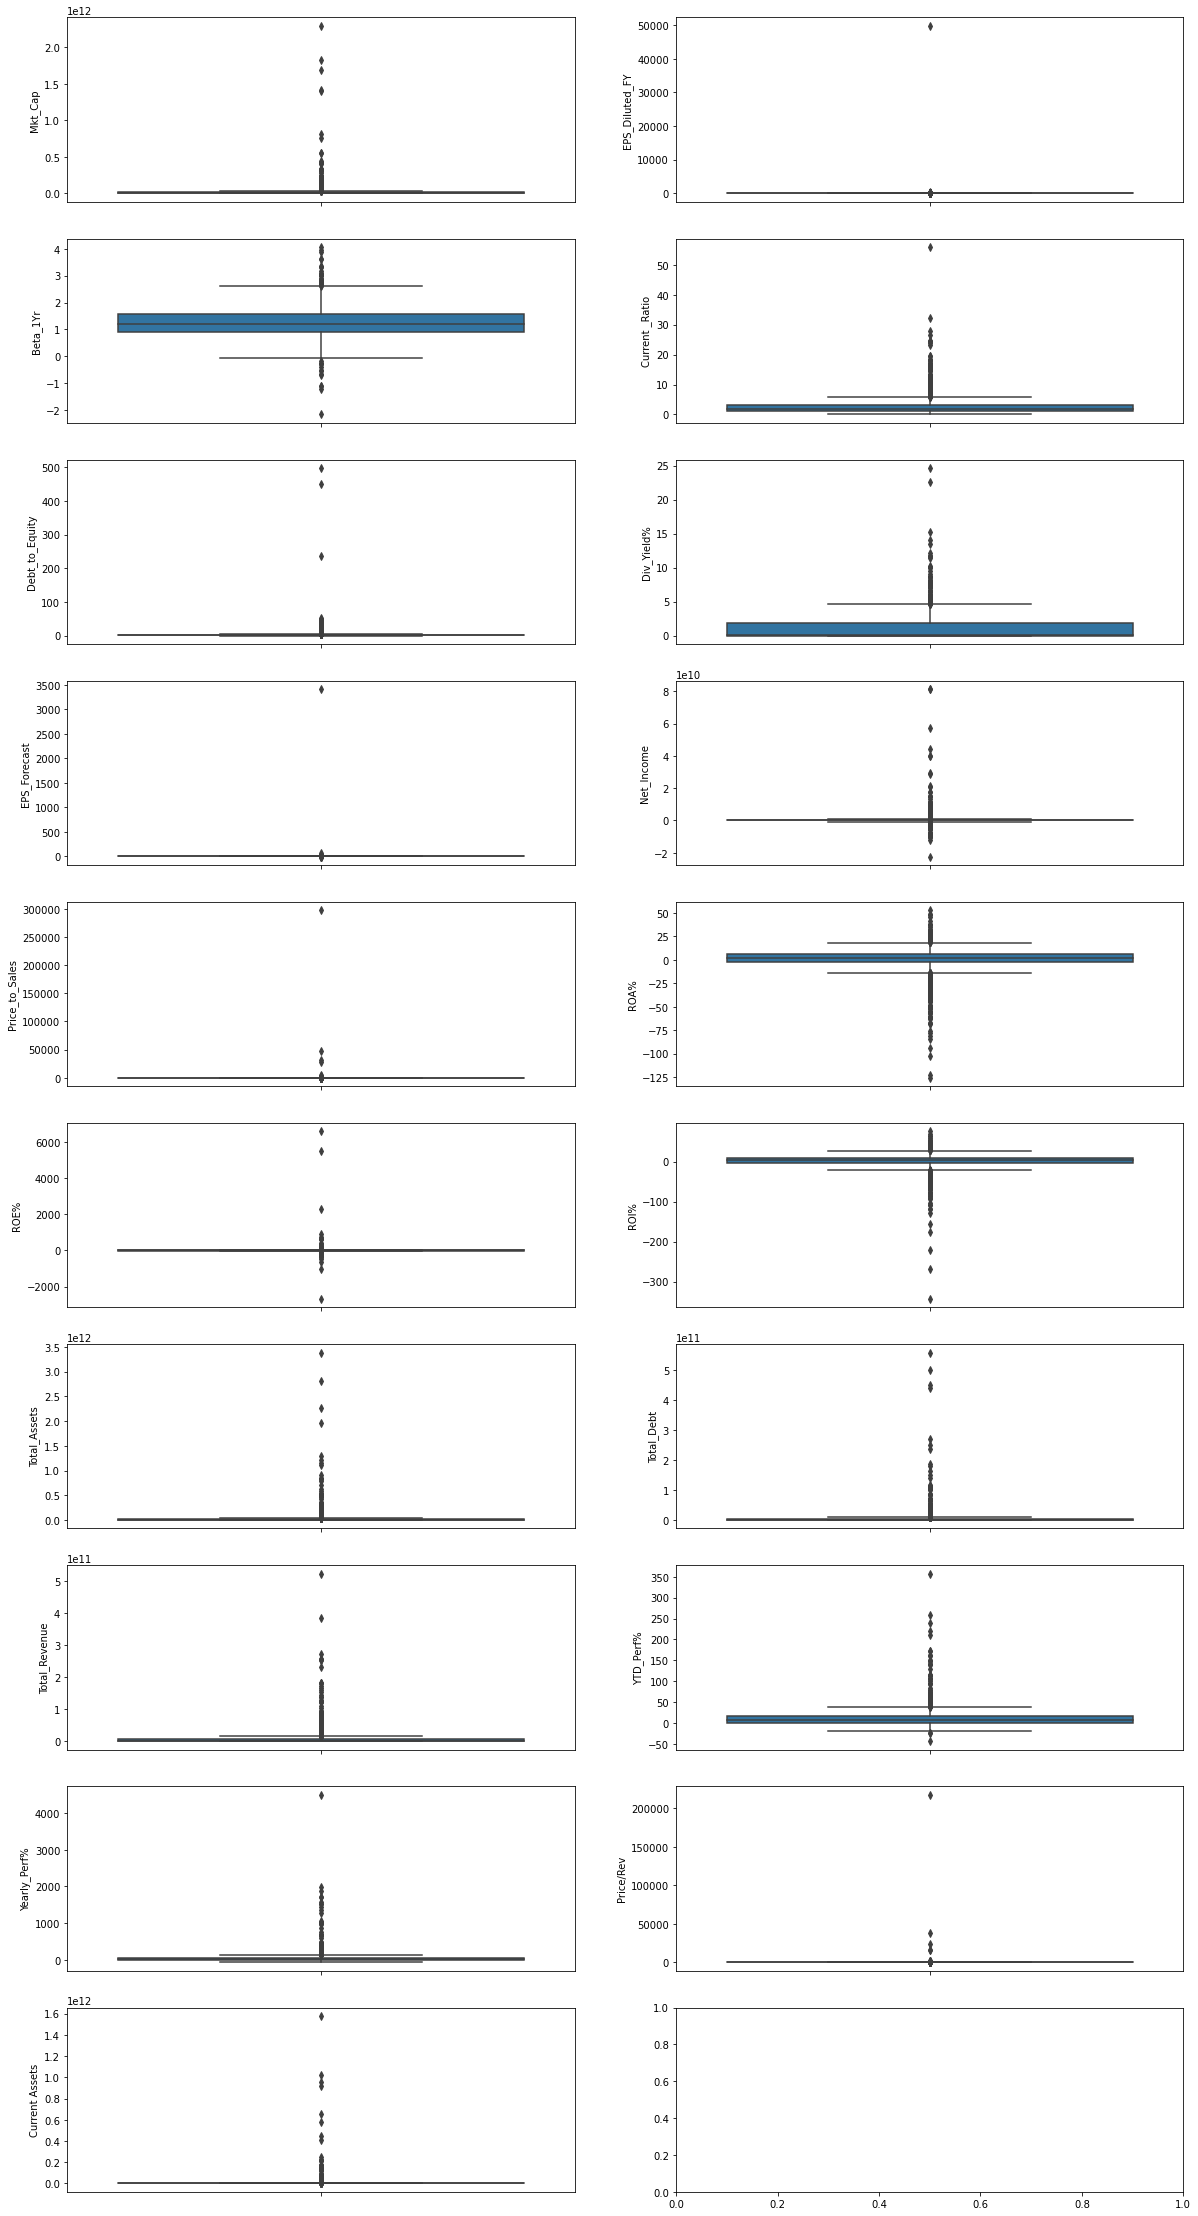

In [962]:
# iterating the columns
col_names = []
for col in num_df.columns: 
    col_names.append(col)

# set figure size
plt.rcParams['figure.figsize'] = (20, 40)

# make subplots
fig, axes = plt.subplots(nrows = 10, ncols = 2)

# draw boxplots in for loop
axes = axes.ravel()
for idx, col in enumerate(col_names):
    # seaborn library 
    sns.boxplot(y=col, data=num_df, ax=axes[idx])

plt.show()


In [963]:
# checking outliers with columns with high missing values
missing_features = df_missing[['Div_per_Share','EBITDA','Gross_Profit','Price_to_Book','Quick_Ratio','Price_to_Earnings', 'Price_to FCF']]
missing_features.shape

(2225, 7)

In [964]:
# dropping rows
missing_features = missing_features.dropna(axis=0)
missing_features.shape

(668, 7)

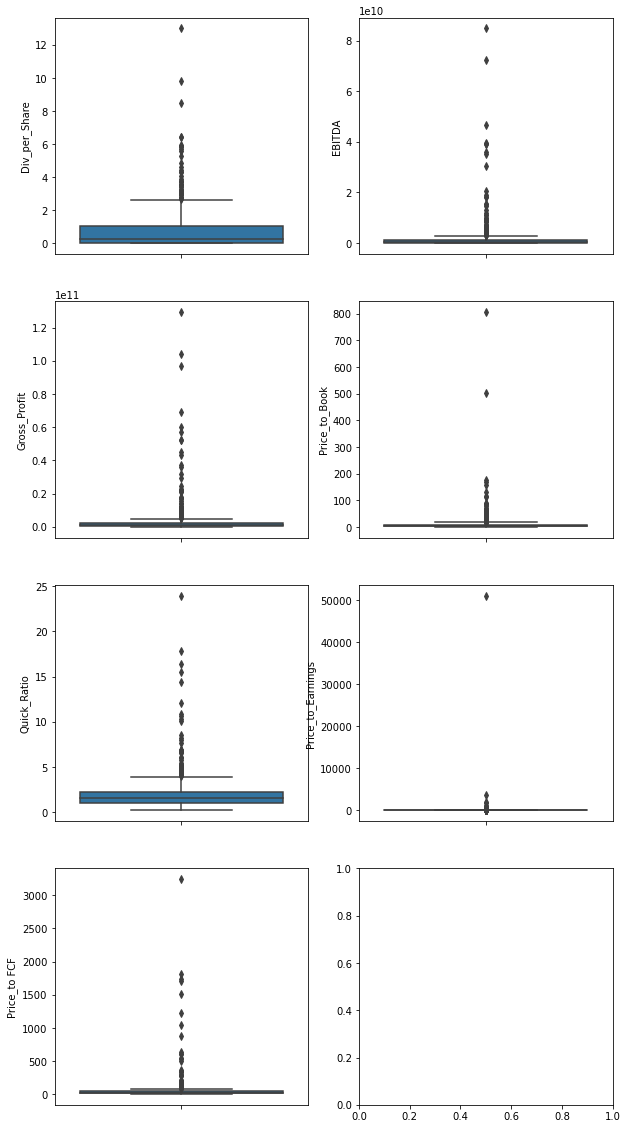

In [965]:
# iterating the columns
col_names = []
for col in missing_features.columns: 
    col_names.append(col)

# set figure size
plt.rcParams['figure.figsize'] = (10, 20)

# make subplots
fig, axes = plt.subplots(nrows = 4, ncols = 2)

# draw boxplots in for loop
axes = axes.ravel()
for idx, col in enumerate(col_names):
    # seaborn library 
    sns.boxplot(y=col, data=missing_features, ax=axes[idx])

plt.show()


So, most of them have outliers. Some of them also have negative values.  It is common to have EPS, Beta, Debt to Equity, Net Income, ROE, ROI and ROA and YTD performance to be negative. All the other variables has extreme values that could be because of large corporate market cap above 1000B. Those are Amazon, AAPL, Google and couple others. It is also common for companies to have high PE ratio. Whether I want to remove it or not really depends on the kind of analysis I will be doing after the data preparation step, also what features are most significant to the target variable(current stock price), Thus outliers and influential points should be handled after the EDA of the data. After I merged the data, I want to further check whether these outliers are also influential points using cooks distance, if they are then I will most certainly drop those values. For now I am saving saving the cleaned data as it is.

In [970]:
df.to_csv('clean_htm_data.csv', encoding='utf-8', index=False)

### Summary of the Milestone 3

I have performed the following steps:
1. Reading the data from the html file and webscraped the data table
2. Striped String data of whitespace and
3. Renaming data headers
4. Transforming Data Types from object to integers
5. Checked Duplicates 
6. Identifying Missing values
7. Identifying Outliers

Number 4 step took the most work, because all columns were suppose to be integers or float values, but instead it was a messy data with symbols and alphabets. All of them were string type, and not in a correct format. I have looked into both missing values and outliers, and identified all the columns with missing values and outliers. However, I have not removed nay values from this dataset, because outliers are not necessarily bad considering large companies with bigger Market Cap can be outlier as well as companies with high PE ratio, both however is quite common. I have to check if it's influential or not, and after that I will be removing it from combined dataset.